In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Download dataset DataProject_raw.xlsx and save where you like, then input path below 
#(remember to replace '\' with '\\' or '/' in the path):

dfxG = pd.read_excel('C:/Users/kaspe/.vscode/projects-2024-rune-co/projects-2024-rune-co/dataproject/DataProject_raw.xlsx', sheet_name='xG')

dfShots = pd.read_excel('C:/Users/kaspe/.vscode/projects-2024-rune-co/projects-2024-rune-co/dataproject/DataProject_raw.xlsx', sheet_name='Shots')

df = pd.merge(dfxG, dfShots, on=['Home', 'Away'])

print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kaspe/.vscode/projects-2024-rune-co/projects-2024-rune-co/dataproject/DataProject_raw.xlsx'

In [10]:
df['HomexGShot'] = df['HomexG']/df['HS']
df['AwayxGShot'] = df['AwayxG']/df['AS']

df["HP"] = 3*(df['FTHG']>df['FTAG']) + (df['FTHG']==df['FTAG'])
df["AP"] = 3*(df['FTAG']>df['FTHG']) + (df['FTHG']==df['FTAG'])

print(df)

     Wk            Home HomexG Score AwayxG             Away  HS  AS  FTHG  \
0     1  Crystal Palace    1.2   0–2      1          Arsenal  10  10     0   
1     1          Fulham    1.2   2–2    1.2        Liverpool   9  11     2   
2     1       Tottenham    1.5   4–1    0.5      Southampton  18  10     4   
3     1   Newcastle Utd    1.7   2–0    0.3  Nott'ham Forest  23   5     2   
4     1    Leeds United    0.8   2–1    1.3           Wolves  12  15     2   
..   ..             ...    ...   ...    ...              ...  ..  ..   ...   
375  38         Everton      1   1–0    0.5      Bournemouth  13   7     1   
376  38  Leicester City    1.4   2–1    1.4         West Ham  13  16     2   
377  38     Aston Villa    2.8   2–1    1.4         Brighton  12   8     2   
378  38    Leeds United    1.5   1–4    2.2        Tottenham  19  11     1   
379  38       Brentford    1.3   1–0    1.6  Manchester City  11  17     1   

     FTAG HomexGShot AwayxGShot  HP  AP  
0       2       0.12 

In [11]:
#This will take 2-3 minutes to run. You can set n lower if you're impatient.

n = 10000
np.random.seed(1909)

for index, row in df.iterrows():
    HomeShots = []
    for j in range(row['HS']):
        HomeShots.append(row["HomexGShot"])
    
    AwayShots = []
    for j in range(row['AS']):
        AwayShots.append(row["AwayxGShot"])

    team1wins = 0
    draws = 0
    team2wins = 0

    for b in range(n):
        team1goals = 0
        team2goals = 0
        for j in range(len(HomeShots)):
            x = np.random.random()
            if x < HomeShots[j]:
                team1goals += 1
        for k in range(len(AwayShots)):
            y = np.random.random()
            if y < AwayShots[k]:
                team2goals += 1
        if team1goals > team2goals:
            team1wins += 1
        elif team1goals < team2goals:
            team2wins += 1
        else:
            draws += 1

    team1points = team1wins *3 + draws
    team2points = team2wins *3 + draws
    
    df.loc[index,"HomexP"] = team1points/n
    df.loc[index,"AwayxP"] = team2points/n

print(df)

     Wk            Home HomexG Score AwayxG             Away  HS  AS  FTHG  \
0     1  Crystal Palace    1.2   0–2      1          Arsenal  10  10     0   
1     1          Fulham    1.2   2–2    1.2        Liverpool   9  11     2   
2     1       Tottenham    1.5   4–1    0.5      Southampton  18  10     4   
3     1   Newcastle Utd    1.7   2–0    0.3  Nott'ham Forest  23   5     2   
4     1    Leeds United    0.8   2–1    1.3           Wolves  12  15     2   
..   ..             ...    ...   ...    ...              ...  ..  ..   ...   
375  38         Everton      1   1–0    0.5      Bournemouth  13   7     1   
376  38  Leicester City    1.4   2–1    1.4         West Ham  13  16     2   
377  38     Aston Villa    2.8   2–1    1.4         Brighton  12   8     2   
378  38    Leeds United    1.5   1–4    2.2        Tottenham  19  11     1   
379  38       Brentford    1.3   1–0    1.6  Manchester City  11  17     1   

     FTAG HomexGShot AwayxGShot  HP  AP  HomexP  AwayxP  
0    

In [12]:
homesum_df = df.groupby('Home').agg({'HomexP':"sum","HP":"sum"}).reset_index() 
awaysum_df = df.groupby("Away").agg({'AwayxP':"sum","AP":"sum"}).reset_index()

sums_df = pd.merge(homesum_df, awaysum_df, left_on='Home', right_on='Away')
sums_df["Exp. Points"] = sums_df["HomexP"] + sums_df["AwayxP"]
sums_df["Points"] = sums_df["HP"] + sums_df["AP"]


sums_df = sums_df.rename(columns={"Home": "Team"}).drop(columns=["Away","HomexP","AwayxP","HP","AP"]).sort_values(by="Exp. Points",ascending=False)
sums_df["Actual pos."] = sums_df["Points"].rank(ascending=False).astype(int)
sums_df["Difference"] = sums_df["Exp. Points"] - sums_df["Points"]
sums_df['Exp. Points'] = sums_df['Exp. Points'].round(1)
sums_df['Difference'] = sums_df['Difference'].round(1)

sums_df = sums_df.reset_index(drop=True)
sums_df.index += 1
print(sums_df)

               Team  Exp. Points  Points  Actual pos.  Difference
1   Manchester City         80.6      89            1        -8.4
2           Arsenal         70.6      84            2       -13.4
3     Newcastle Utd         70.0      71            4        -1.0
4          Brighton         66.8      62            6         4.8
5         Liverpool         65.5      67            5        -1.5
6    Manchester Utd         63.0      75            3       -12.0
7         Tottenham         58.2      60            8        -1.8
8         Brentford         57.3      59            9        -1.7
9       Aston Villa         54.2      61            7        -6.8
10          Chelsea         52.1      44           12         8.1
11         West Ham         51.9      40           14        11.9
12   Crystal Palace         45.8      45           11         0.8
13   Leicester City         44.3      34           18        10.3
14     Leeds United         42.7      31           19        11.7
15        

NameError: name 'sums_df' is not defined

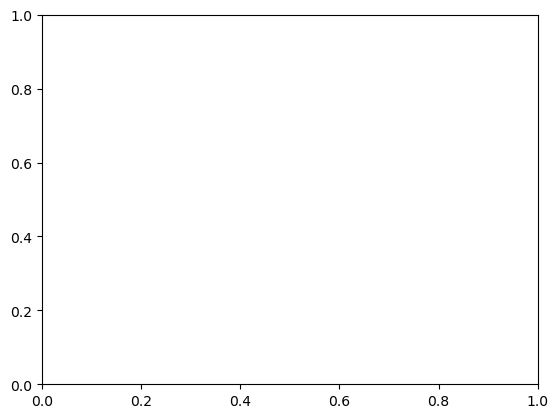

In [2]:
# Plotting
fig, ax = plt.subplots()
# Creating indices for each group of bars
indices = range(len(sums_df['Team']))

# Bar width
width = 0.3

# Plotting both actual and predicted points
actual_bars = ax.bar(indices, df['Points'], width, label='Actual Points')
predicted_bars = ax.bar([p + width for p in indices], df['Exp. Points'], width, label='Predicted Points')

# Adding labels, title, and legend
ax.set_xlabel('Team')
ax.set_ylabel('Points')
ax.set_title('Comparison of Actual and Predicted Points by Club')
ax.set_xticks([p + width / 2 for p in indices])
ax.set_xticklabels(df['Team'])
ax.legend()

# Show the plot
plt.show()
